Evaluate the Statement:

1. If an ARIMA model is adequate (properly built), it has residual autocorrelations  that are all equal to zero.


In [594]:
# False: The ARIMA model is adequate as long as the lags of residual autocorrelations are not significant (within confidential interval). They don't need to be zero.

2. When would you use non-seasonal differencing and when would you use seasonal differencing? 

In [595]:
# Non-seasonal differencing removes trend and random walk type of non-stationarity (unit root), 
# Seasonal differencing removes seasonal trend and seasonal random walk type of non-stationarity (seasonal unit root process). 
# If the data has a strong and consistent seasonal pattern (monthly or quarterly or by 4 seasons), we use one order of seasonal differencing.
# If the data has no strong seasonal pattern (like annual data with only potential trends), we use non-seasonal differencing.

3. For a sample of 100 observations of random data, calculate a 95% confidence interval for autocorrelation coefficient at any lag. 

In [596]:
# Ho: kth lag population correlation = corr(y(t),y(t-k)) = 0
# Ha: kth lag population correlation = corr(y(t),y(t-k)) ≠ 0
# If the Ho is true, kth lag sample correlation follows approximately Normal distribution with mean 0 and variance 1/N, where N is the sample size. 
# By definition Confidence interval = sample correlation coefficient ∓ Marging of error, where
# Margin of error = z𝝰/2 * Standard error/deviation of sample correlation = z𝝰/2 * 1/sqrt(N)
# Since the data is random, I will place the interval around 0.
# 𝝰 = 5% --> 𝝰/2 = 2.5%
# z𝝰/2 = 2
# 95% confidence interval = Margin of error = ∓z𝝰/2* 1/sqrt(N) = ∓2*1/sqrt(100) = ∓2/10 = ∓0.2

4. If all the autocorrelation coefficients are within their individual 95% confidence intervals and they show no particular pattern, what conclusion about the process can be drawn? 

In [597]:
# If autocorrelations equal zero, this implies that the residuals are white noise
#  As mentioned in the Q &A, "no correlation = no predictable pattern is present in data and there is no need to build a model for that data"  
# When we build models we would like the residuals aswhite noise. 
# If the residuals are white noise process that implies that out model captured all predictable patterns and whatever is left is noise. 

5. A process is observed quarterly. If lag 4,8 and 12 autocorrelations r4(=correlation(Yt,Yt-4)), r8, and r12 are significantly different from zero, what conclusion can be drawn? 

In [598]:
# We can conclude that the seasonality is 4 periods, and thus we should further perform seasonal differencing to make data stationary before modeling

6. Suppose the following time series model has been fit to historical data and found to be an adequate model. 
Yt=35+ εt+ .25εt−1− .30εt−2
The first four observations are Y1=32.5, Y2=36.6, Y3=33.3, and  Y4=31.9. Assuming Y0=35 and ε0=0, calculate forecasts for periods 5, 6, and 7 if period 4 is the forecast origin. 


In [599]:
# Y1 = 35+ε1 =32.5
# --> ε1 = -2.5
# Y2 = 35+ε2 + 0.25ε1 =36.6
# --> ε2 = 2.225
# Y3 = 35+ε3 + 0.25ε2 - 0.3ε1 =33.3
# --> ε3 = -3.00625
# Y4 = 35+ε4 + 0.25ε3 - 0.3ε2 =31.9
# --> ε4 = -1.68
# Y5 = 35+ε5 + 0.25ε4 - 0.3ε3 =35 + 0.25*(-1.68) - 0.3*(-3.00625)= 35.48
# Y6 = 35+ε6 + 0.25ε5 - 0.3ε4 =35 - 0.3*(-1.68)= 35.504
# Y7 = 35

7. Given the graphs of three time series and their corresponding autocorrelations and partial autocorrelations, tentatively identify an ARIMA model from each triplet of graphs: 


In [600]:
# M1 = ARIMA(0,1,2)
# M2 = ARIMA(0,0,1)
# M3 = ARIMA(0,0,2)

In [601]:
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

8. Import both time series directly from FRED into python.


In [602]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [603]:
import pandas as pd
import numpy as np
from plotnine import *
import pandas_datareader as pdr
import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import pmdarima as pmd
from pmdarima import model_selection

In [604]:
df1 = pd.read_html('https://fred.stlouisfed.org/series/LAUST060000000000003A#0')
start1 = dt.datetime(1976,1,1)
end1 = dt.datetime(2020,2,1) 
df1 = pdr.DataReader(name = 'LAUST060000000000003A', data_source='fred', start=start1, end=end1)
df1.columns = ['UnOfCA']

In [605]:
df1

,UnOfCA
DATE,
1976-01-01,9.2
1977-01-01,8.4
1978-01-01,7.1
1979-01-01,6.2
1980-01-01,6.9
1981-01-01,7.4
1982-01-01,10.1
1983-01-01,9.8
1984-01-01,7.7


In [606]:
df2 = pd.read_html('https://fred.stlouisfed.org/series/UNRATENSA')
start2 = dt.datetime(1948,1,1)
end2 = dt.datetime(2020,2,1) 
df2 = pdr.DataReader(name = 'UNRATENSA', data_source='fred', start = start2, end=end2)
df2.columns = ['UnOfUS']

In [607]:
df2

,UnOfUS
DATE,
1948-01-01,4.0
1948-02-01,4.7
1948-03-01,4.5
1948-04-01,4.0
1948-05-01,3.4
...,...
2019-10-01,3.3
2019-11-01,3.3
2019-12-01,3.4


9. Visualize both series and interpret the patterns you see in data.

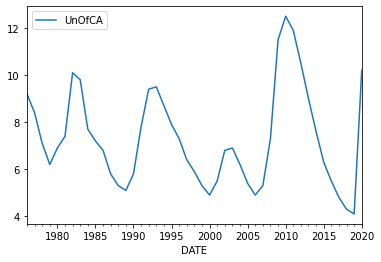

In [608]:
df1.plot()

In [609]:
# There is a cyclical pattern. We see that for every decade, there is a potential peak in annual unemployment rates of California.
# Overall, there was a declining trend before Year 2005. 
# Around year 2010, the annual unemployment rate of California was highest, possibly caused by economic crisis.

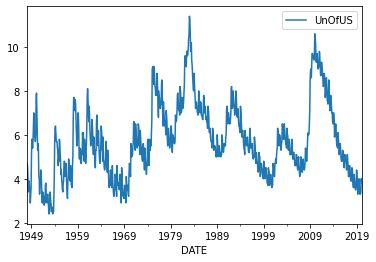

In [610]:
df2.plot()

In [611]:
# Overall, there is a cyclical pattern, similar to that of California's unemployment rate.
# There are seasonal trends and noises in the data of monthly unemplotment rate in the U.S..

10. Create the acf plot for each series and describe the dependence structure in both of the original series. 

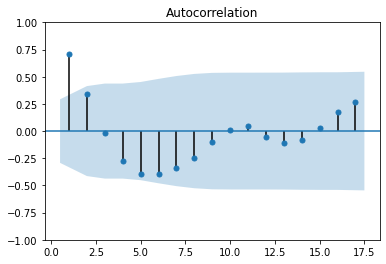

In [612]:
plot_acf(df1,zero=False);

In [613]:
# The 1st lag in the data of annual California's unemployment rate is significant.

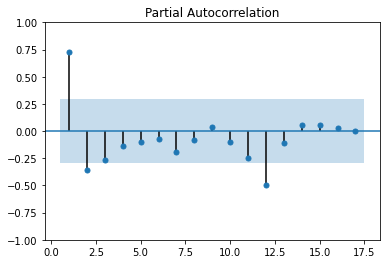

In [614]:
plot_pacf(df1,zero=False);

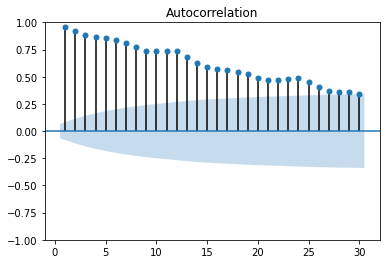

In [615]:
plot_acf(df2,zero=False);

In [616]:
# The autocorrelations decline slowly. I consider the first 12 lags significant.
# This indicates that the data is not stationary and is in need of a non-seasonal differencing.

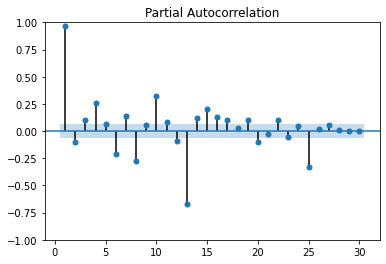

In [617]:
plot_pacf(df2,zero=False);

11. Based on the visualizations you created in previous questions, do you think series are stationary or not? Why do we care whether data is stationary or not?

In [618]:
# Df1 is stationary.
# Df2 is not stationary. 
# We care because we can build ARIMA models with only stationary data.
# A stationarized series is relatively easy to predict.
# Stationarizing a time series through differencing (where needed) is an important part of the process of fitting an ARIMA model.

12. Carry out the stationarity tests. Do tests suggest the data is stationary?


In [619]:
# Dickey-Fuller test
# Ho: data is NOT stationary
# Ha: data is stationary
# If p-value < 0.05, we reject Ho and conclude Ha, i.e. the data is stationary and we can build and ARMA model
# If p-value > 0.05, we fail to reject Ho and conclude that the data is not stationary and 
# diffrencing needs to be performed to transform not stationary data to stationary and then build an ARMA model

In [620]:
p_value1 = adfuller(df1['UnOfCA'])[1]
p_value1

0.0003320176685703861

In [621]:
# p=0.00 < 0.05, the data of d1 is stationary and we can build an ARMA model

In [622]:
p_value2 = adfuller(df2['UnOfUS'])[1]
p_value2

0.10636271221990662

In [623]:
# p=0.11 > 0.05, the data of d2 is not stationary and we cannot build an ARMA model
# We first need to transform not stationary data to stationary data
# The typical tranformation is differencing

In [624]:
#  KPSS test
# Ho: data is level stationary 
# Ha: data is not stationary

In [625]:
p_value11 = kpss(df1,regression = 'c',nlags='auto')[1] #c stands for constant
p_value11

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.



0.1

In [626]:
# Since p=0.1 > 0.05, we conclude that df1 is stationary

In [627]:
p_value22 = kpss(df2,regression = 'c',nlags='auto')[1] #c stands for constant
p_value22

0.03631825062266092

In [628]:
# Since p=0.04 < 0.05, we conclude that df2 is not stationary

13. What corrections would you recommend if the series is non-stationary?

In [629]:
# There are monthly seasonality in df2, so I will conduct both seasonal and non-seasonal differencing to df2 to make it stationary.

14. Perform necessary preprocessing on both series (for example, differencing transformations if needed) and identify an appropriate ARIMA model(s) for each series.

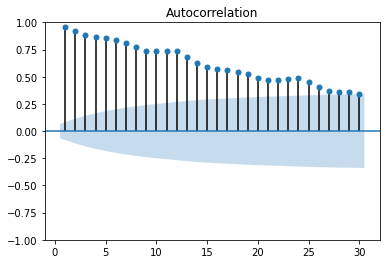

In [630]:
plot_acf(df2, missing='drop', zero=False);

In [631]:
# We can see that the data is not stationary.
# Since it have a linear declining trend, we will employ a non-seasonal differencing

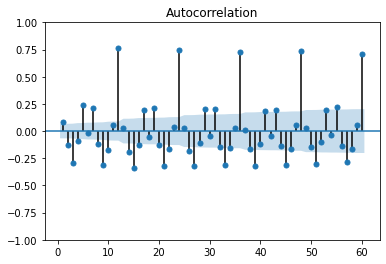

In [632]:
plot_acf(df2.diff(1).dropna(),lags=60,zero=False);

In [633]:
# From this graph, we can see that the data is still not stationary because it has seasonal lags.
# Therefore, we need to further employ seasonal differencing with a seaonality of 12.

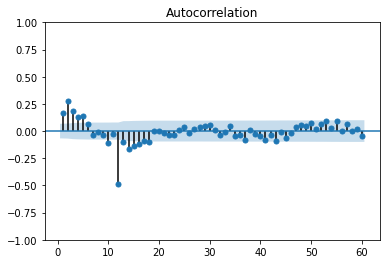

In [634]:
plot_acf(df2.diff(1).diff(12).dropna(), lags=60,zero=False);

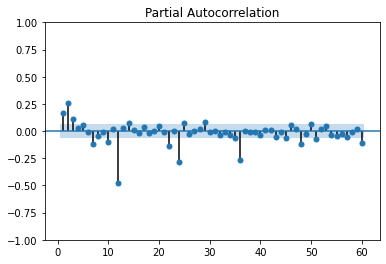

In [635]:
plot_pacf(df2.diff(1).diff(12).dropna(), lags=60,zero=False);

In [636]:
# Yeah! It is stationary now.

In [637]:
print(pmd.arima.ndiffs(df2.dropna(), test='kpss')) 

1


In [638]:
print(pmd.arima.ndiffs(df2.diff(1).diff(12).dropna(), test='kpss')) 

0


In [639]:
print(pmd.arima.ndiffs(df2.dropna(), test='adf')) 

1


In [640]:
print(pmd.arima.ndiffs(df2.diff(1).diff(12).dropna(), test='adf')) 

0


In [641]:
# This proves that our differencing approaches are effective and our data of df2 is stationary now.

In [642]:
print(pmd.arima.ndiffs(df1.dropna(), test='kpss')) 

0


In [643]:
# The KPSS test indicates df1 is stationary.

In [644]:
print(pmd.arima.ndiffs(df1.dropna(), test='adf')) 

2


In [645]:
# From the acf graph above, we observed df1 was stationary. 
# It is further confimed by the KPSS testing.
# In quetsion 12, with the p-value, we also proved that df1 was stationary.
# So no differenicng was employed to df1.
# Employing a 2nd order of differencing referred by the ADF test will potentilly overfit the data.
# Thus, we decided not to employ further differencing to df1.

In [646]:
df2_diff12 = df2.diff(1).diff(12).dropna()

print(pmd.arima.OCSBTest(m=12).estimate_seasonal_differencing_term(df2_diff12)) 
print(pmd.arima.CHTest(m=12).estimate_seasonal_differencing_term(df2_diff12))

0
0


In [647]:
# With OCSB and CH Test, we further proved that df2 is stationary now after seasonal and non-seasonal differencing.

15. What is the simplest models that provide an adequate description of the observed data (this is sometimes known as the principle of parsimony). Discuss with reference to residual plots, residual autocorrelations, and the Box test.

In [648]:
# From the graphs of acf and pacf

In [649]:
# ARIMA Model for df1

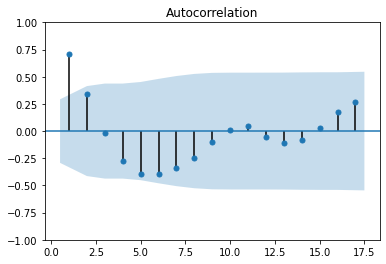

In [650]:
plot_acf(df1,zero=False);

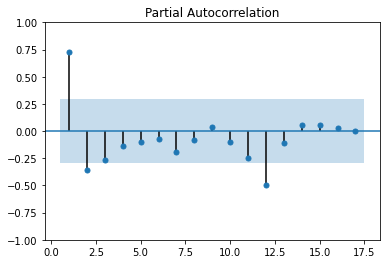

In [651]:
plot_pacf(df1,zero=False);

In [652]:
M11 = ARIMA(df1['UnOfCA'],order=(0,0,1)) #-> the number of parameters to be estimated is 1
M12 = ARIMA(df1['UnOfCA'],order=(1,0,0)) #-> the number of parameters to be estimated is 1
M13 = ARIMA(df1['UnOfCA'],order=(1,0,1)) #-> the number of parameters to be estimated is 2

M11_fit = M11.fit()
M12_fit = M12.fit()
M13_fit = M13.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided,

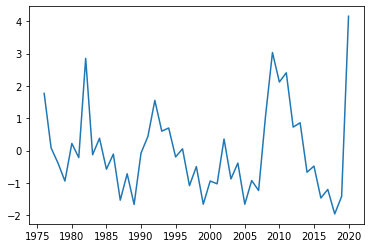

In [653]:
plt.plot(M11_fit.resid)

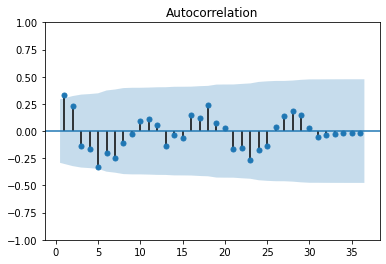

In [654]:
plot_acf(M11_fit.resid,lags=36,zero=False);

In [655]:
M11_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 UnOfCA   No. Observations:                   45
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -78.287
Date:                Wed, 23 Nov 2022   AIC                            162.574
Time:                        09:27:28   BIC                            167.994
Sample:                    01-01-1976   HQIC                           164.594
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4306      0.499     14.879      0.000       6.452       8.409
ma.L1          0.9992      4.296      0.233      0.816      -7.421       9.419
sigma2         1.7457      7.412      0.236      0.814     -12.781      16.273
===================================================================================
Ljung-Box (L1) (Q):                   5.46   Jarque-Bera (JB):                10.68
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               3.29   Skew:                             1.09
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [656]:
# p-value=0.02<0.05

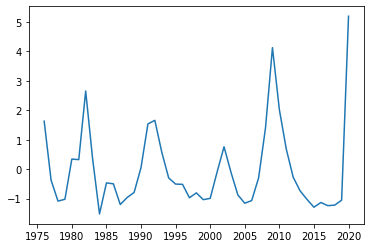

In [657]:
plt.plot(M12_fit.resid)

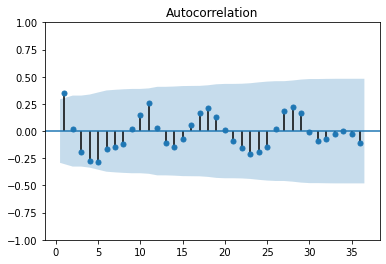

In [658]:
plot_acf(M12_fit.resid,lags=36,zero=False);

In [659]:
M12_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 UnOfCA   No. Observations:                   45
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -79.775
Date:                Wed, 23 Nov 2022   AIC                            165.549
Time:                        09:27:29   BIC                            170.969
Sample:                    01-01-1976   HQIC                           167.570
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5670      1.171      6.463      0.000       5.272       9.862
ar.L1          0.7396      0.121      6.113      0.000       0.502       0.977
sigma2         1.9938      0.455      4.378      0.000       1.101       2.886
===================================================================================
Ljung-Box (L1) (Q):                   6.21   Jarque-Bera (JB):                49.73
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               3.62   Skew:                             1.86
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [660]:
# p-value=0.01<0.05

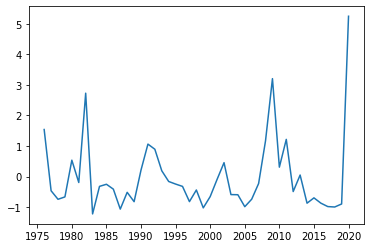

In [661]:
plt.plot(M13_fit.resid)

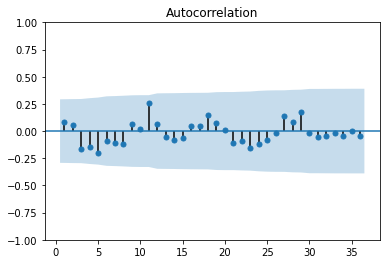

In [662]:
plot_acf(M13_fit.resid,lags=36,zero=False);

In [663]:
M13_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 UnOfCA   No. Observations:                   45
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -73.431
Date:                Wed, 23 Nov 2022   AIC                            154.862
Time:                        09:27:30   BIC                            162.089
Sample:                    01-01-1976   HQIC                           157.556
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6607      1.215      6.307      0.000       5.280      10.041
ar.L1          0.5788      0.210      2.751      0.006       0.166       0.991
ma.L1          0.7206      0.246      2.926      0.003       0.238       1.203
sigma2         1.4694      0.324      4.542      0.000       0.835       2.104
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):               132.94
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               3.46   Skew:                             2.45
Prob(H) (two-sided):                  0.02   Kurtosis:                         9.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [664]:
# Q15-df1 Ljung-Box
# p-value=0.53>0.05
# Therefore we choose model ARIMA(1,0,1) as the simplest model that provides an adequate description of the observed data.

In [665]:
# Q16-df1 AIC
# AIC of 154.862 which is the smallest among the three models above
# Therefore we choose model ARIMA(1,0,1) as the best model based on AIC value

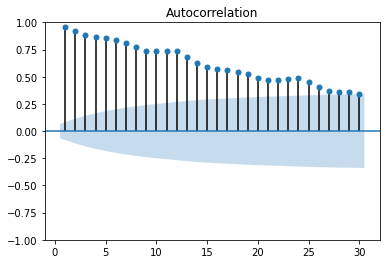

In [666]:
plot_acf(df2,zero=False);

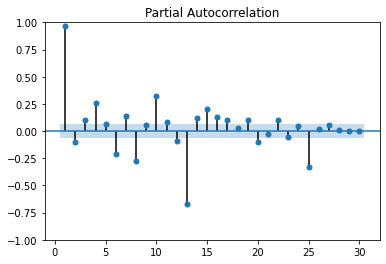

In [667]:
plot_pacf(df2,zero=False);

In [668]:
M21 = sm.tsa.statespace.SARIMAX(df2['UnOfUS'],order=(0,1,0),seasonal_order=(0,0,1,12))
M22 = sm.tsa.statespace.SARIMAX(df2['UnOfUS'],order=(1,1,1),seasonal_order=(0,0,1,12))
M23 = sm.tsa.statespace.SARIMAX(df2['UnOfUS'],order=(2,1,2),seasonal_order=(0,0,1,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequen

In [669]:
M21_fit = M21.fit()
M22_fit = M22.fit()
M23_fit = M23.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


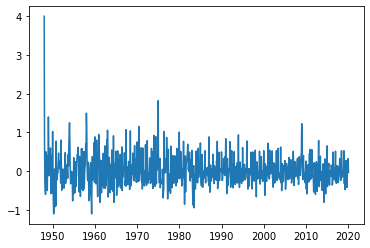

In [670]:
plt.plot(M21_fit.resid)

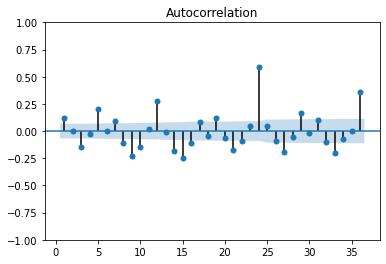

In [671]:
plot_acf(M21_fit.resid,lags=36,zero=False);

In [672]:
M21_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               UnOfUS   No. Observations:                  866
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -371.514
Date:                              Wed, 23 Nov 2022   AIC                            747.028
Time:                                      09:27:41   BIC                            756.554
Sample:                                  01-01-1948   HQIC                           750.674
                                       - 02-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.5213      0.026     19.761      0.000       0.470       0.573
sigma2         0.1376      0.005     26.293      0.000       0.127       0.148
===================================================================================
Ljung-Box (L1) (Q):                  10.54   Jarque-Bera (JB):               128.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

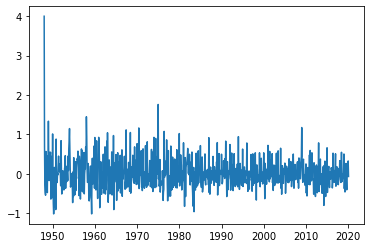

In [673]:
plt.plot(M22_fit.resid)

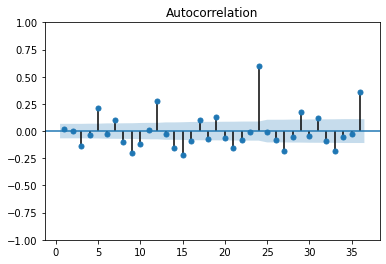

In [674]:
plot_acf(M22_fit.resid,lags=36,zero=False);

In [675]:
M22_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             UnOfUS   No. Observations:                  866
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -366.069
Date:                            Wed, 23 Nov 2022   AIC                            740.139
Time:                                    09:27:42   BIC                            759.190
Sample:                                01-01-1948   HQIC                           747.430
                                     - 02-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0941      0.295      0.319      0.750      -0.485       0.673
ma.L1          0.0181      0.302      0.060      0.952      -0.574       0.610
ma.S.L12       0.5251      0.026     19.867      0.000       0.473       0.577
sigma2         0.1359      0.006     24.437      0.000       0.125       0.147
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               107.85
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [676]:
# p-value=0.97 >0.05, this is adequate

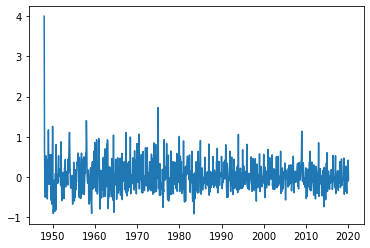

In [677]:
plt.plot(M23_fit.resid)

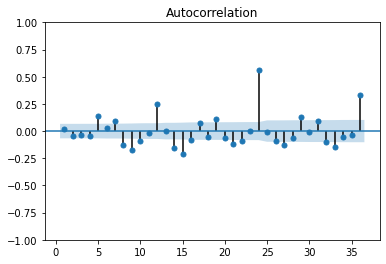

In [678]:
plot_acf(M23_fit.resid,lags=36,zero=False);

In [679]:
M23_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               UnOfUS   No. Observations:                  866
Model:             SARIMAX(2, 1, 2)x(0, 0, [1], 12)   Log Likelihood                -341.708
Date:                              Wed, 23 Nov 2022   AIC                            695.415
Time:                                      09:27:43   BIC                            723.992
Sample:                                  01-01-1948   HQIC                           706.353
                                       - 02-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5871      0.060     -9.832      0.000      -0.704      -0.470
ar.L2         -0.6809      0.057    -12.017      0.000      -0.792      -0.570
ma.L1          0.7226      0.042     17.193      0.000       0.640       0.805
ma.L2          0.8621      0.041     21.094      0.000       0.782       0.942
ma.S.L12       0.5171      0.028     18.240      0.000       0.461       0.573
sigma2         0.1284      0.005     25.404      0.000       0.119       0.138
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               126.40
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [680]:
#Q15(Ljung-Box) --df2
# p-value=0.86>0.05
# We choose the model of SARIMAX(1,1,1)(0,0,1)[12] as the simpliest model that is adequate.

In [681]:
#Q16(AIC) --df2
# We choose the model of SARIMAX(2,1,2)(0,0,1)[12] as the best model based on AIC model

16. Select the best model using AIC and generate forecast for the next (Future: March 2020,….) 12 months for monthly series (US series) and the next 3 years (Future: 2020,2021,2022) for annual series (CA series). Assume current time stamp = February of 2020

In [682]:
# Please see answers above.

In [683]:
df1prediction = df1
df1prediction = df1prediction.reset_index()
df1new = pd.DataFrame([['2021-01-01',np.nan], ['2022-01-01',np.nan], ['2023-01-01',np.nan]],columns=['DATE', 'UnOfUS'])
df1new['DATE'] = pd.to_datetime(df1new['DATE'])
df1prediction = df1prediction.append(df1new)
df1prediction.set_index('DATE', inplace=True)

In [684]:
df1prediction['M13'] = M13_fit.fittedvalues

In [685]:
df1prediction['Prediction'] = M13_fit.predict(start ="2021-01-01",end="2023-01-01",dynamic=True)

In [686]:
df2prediction = df2
df2prediction = df2prediction.reset_index()
df2new = pd.DataFrame([['2020-03-01',np.nan], ['2020-04-01',np.nan], ['2020-05-01',np.nan], ['2020-06-01',np.nan], ['2020-07-01',np.nan],['2020-08-01',np.nan],
                       ['2020-09-01',np.nan], ['2020-10-01',np.nan],['2020-11-01',np.nan],['2020-12-01',np.nan],['2021-01-01',np.nan],['2021-02-01',np.nan]],columns=['DATE', 'UnOfUS'])
df2new['DATE'] = pd.to_datetime(df2new['DATE'])
df2prediction = df2prediction.append(df2new)
df2prediction.set_index('DATE', inplace=True)

In [687]:
df2prediction['M23'] = M23_fit.fittedvalues

In [688]:
df2prediction['M22'] = M22_fit.fittedvalues

In [689]:
df2prediction['Prediction'] = M23_fit.predict(start ="2020-02-01",end="2021-02-01",dynamic=True)

17. Plot each series (US and CA on separate graphs) and overlay fitted values and future forecasts.

In [690]:
df1prediction['Time'] = range(1,49)

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 3 rows containing missing values.
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 3 rows containing missing values.
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 45 rows containing missing values.
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 45 rows containing missing values.


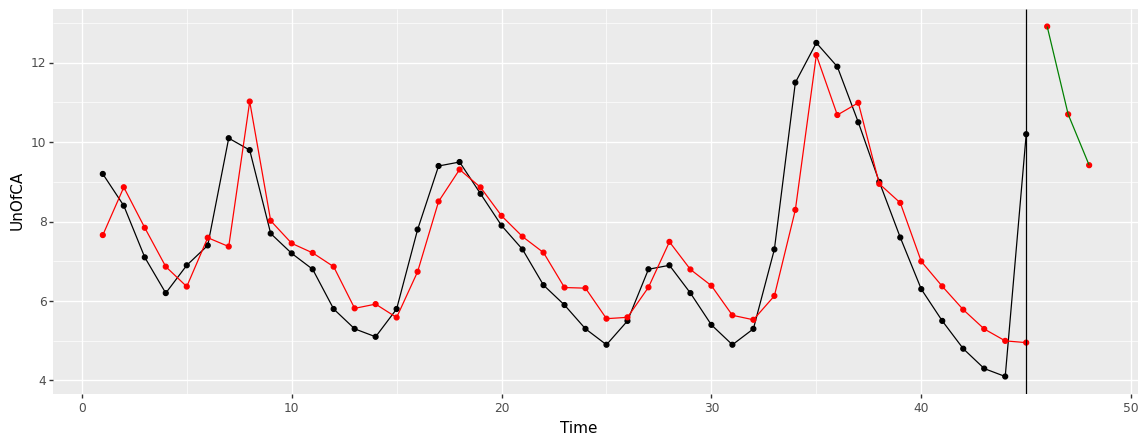

<ggplot: (8776827126581)>

In [691]:
(
    ggplot(df1prediction,aes('Time','UnOfCA')) + geom_point() + geom_line()+ theme(figure_size=(14,5)) + 
    geom_point(aes('Time','M13'),color='red') + geom_line(aes('Time','M13'),color='red') +       # fitted/predicted values of regression model
    geom_point(aes('Time','Prediction'),color='red') + geom_line(aes('Time','Prediction'),color='green') +
    geom_vline(xintercept = len(df1))
)

In [692]:
df2prediction['Time'] = range(1,879)

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 12 rows containing missing values.
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 12 rows containing missing values.
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 106 rows containing missing values.
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 106 rows containing missing values.


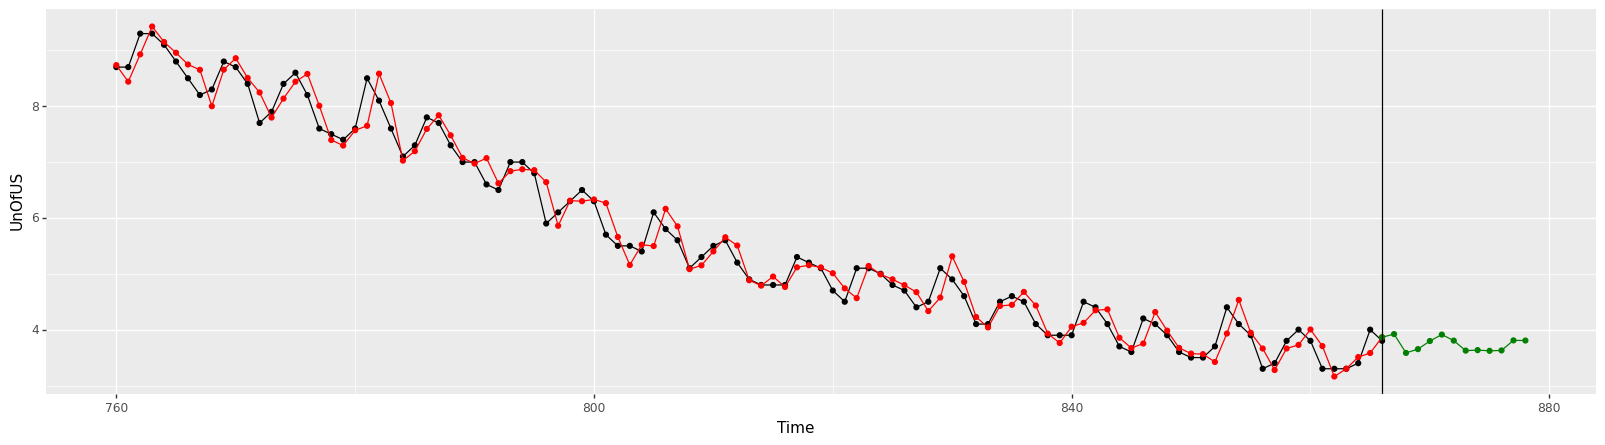

<ggplot: (8776827359253)>

In [693]:
(
    ggplot(df2prediction.iloc[759:,],aes('Time','UnOfUS')) + geom_point() + geom_line()+ theme(figure_size=(20,5)) + 
    geom_point(aes('Time','M23'),color='red') + geom_line(aes('Time','M23'),color='red') +       # fitted/predicted values of regression model
    geom_point(aes('Time','Prediction'),color='green') + geom_line(aes('Time','Prediction'),color='green') +
    geom_vline(xintercept = len(df2))
)

In [694]:
# For your better visual experience, we select the latest 10 years data for fitted values and predictions. 

18. Report MAPE of the champion model for each series.

In [695]:
def mape(actual,predicted):
    return round(abs((actual - predicted)/actual).mean()*100,2)

In [696]:
def accuracy(actual,predicted,h=0):
    n_train = len(actual) - h
    accuracy_metrics = pd.DataFrame(columns=['MAPE(%)'],index=['Training set','Testing set'])
    accuracy_metrics.loc['Training set','MAPE(%)'] = mape(actual[:n_train],predicted[:n_train])
    if (h>0):
        accuracy_metrics.loc['Testing set','MAPE(%)'] = mape(actual[n_train:],predicted[n_train:])
    return accuracy_metrics

In [697]:
# MAPE of the champion model for Annual CA Unemployment Rate

In [698]:
accuracy(actual=df1['UnOfCA'], predicted = df1prediction['M13'], h=12)

,MAPE(%)
Training set,9.78
Testing set,16.76


In [699]:
# MAPE of the champion model for Monthly US Unemployment Rate

In [700]:
accuracy(actual=df2['UnOfUS'], predicted = df2prediction['M23'], h=12)

,MAPE(%)
Training set,5.16
Testing set,5.28


In [701]:
accuracy(actual=df2['UnOfUS'], predicted = df2prediction['M22'], h=12)

,MAPE(%)
Training set,5.29
Testing set,5.23


In [702]:
# Based on MAPE, testing set < training set, so we also consider M22 as the champion model.

19. What is the best model using the auto arima function for each series?




In [724]:
M1 = pmd.auto_arima(df1['UnOfCA'], start_p=1, d=None, start_q=0, max_p=2, max_d=1, max_q=2, #d=None means it will test itself to see if there is d or D
                   start_P=0, D=None, start_Q=0, max_P=1, max_D=1, max_Q=1, max_order=10,
                   trace = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=165.549, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=197.428, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=312.086, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=147.564, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=149.471, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=154.862, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=165.595, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.800 seconds


In [704]:
# Based on the auto arima function, the best model for df1 is: ARIMA(0,1,1)(0,0,0)[0]        

In [705]:
M2 = pmd.auto_arima(df2, start_p=1, d=None, start_q=0, max_p=2, max_d=1, max_q=3, 
                   start_P=0, D=None, start_Q=0, max_P=2, max_D=1, max_Q=2, max_order=10, m=12,
                   trace = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1122.014, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1126.012, Time=0.42 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=316.864, Time=2.80 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=740.447, Time=2.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1124.012, Time=0.27 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=7.57 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2.268, Time=4.52 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=740.149, Time=1.47 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3.921, Time=19.26 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3.910, Time=17.08 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=548.977, Time=4.74 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=5.680, Time=16.26 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=23.570, Time=1.96 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-33.252, Time=4.76 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : A

In [706]:
# Based on the auto arima function, the best model for df2 is:  ARIMA(2,1,1)(1,0,1)[12]

20. Are the best auto models adequate? Discuss with reference to residual plots, residual autocorrelations, and the Box test.

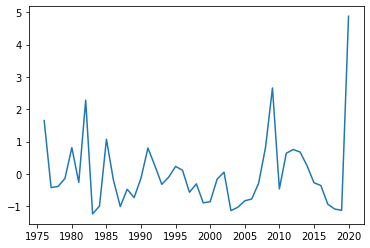

In [725]:
plt.plot(M1.resid())

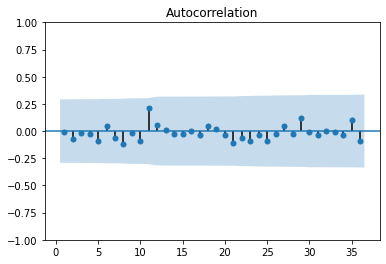

In [726]:
plot_acf(M1.resid(),lags=36,zero=False);

In [727]:
print(M1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   45
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -69.782
Date:                Wed, 23 Nov 2022   AIC                            147.564
Time:                        09:33:57   BIC                            154.791
Sample:                    01-01-1976   HQIC                           150.258
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9901      1.029      2.907      0.004       0.974       5.006
ar.L1          1.3246      0.161      8.226      0.000       1.009       1.640
ar.L2         -0.7208      0.184     -3.919      0.0

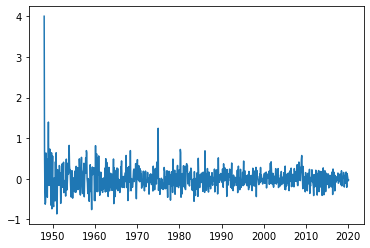

In [710]:
plt.plot(M2.resid())

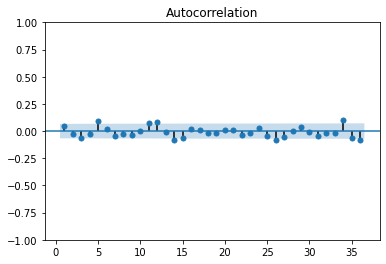

In [711]:
plot_acf(M2.resid(),lags=36,zero=False);

In [712]:
print(M2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  866
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  27.361
Date:                            Wed, 23 Nov 2022   AIC                            -42.723
Time:                                    09:32:16   BIC                            -14.146
Sample:                                01-01-1948   HQIC                           -31.785
                                     - 02-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5938      0.100      5.957      0.000       0.398       0.789
ar.L2          0.1270      0.042   

21. Report MAPE of the best auto arima model for each series

In [728]:
M1_fit = M1.fittedvalues()

In [729]:
df1['M1'] = M1_fit

In [730]:
accuracy(actual=df1['UnOfCA'], predicted = df1['M1'], h=12)

,MAPE(%)
Training set,9.38
Testing set,15.09


In [716]:
M2_fit = M2.fittedvalues()

In [717]:
df2['M2'] = M2_fit

In [718]:
accuracy(actual=df2['UnOfUS'], predicted = df2['M2'], h=12)

,MAPE(%)
Training set,3.58
Testing set,2.25


22. What does Jim Clifton suggest about unemployment forecasting in his article  


In [719]:
# Clifton suggests that the official unemployment rate reported by the U.S. Department of Labor is misleading: 
# it overlooks the long-term and permanently unemployed as well as the underemployed population. 
# For example, the Department of Labor doesn’t count persons who have lost their jobs and stopped looking over for job for four weeks.
# Besides, those who perform a minimum of one hour of work a week, that is underemployed, are not considered unemployed either.
# Currently, the market only provides 44% of full time jobs of the adult population. 
# An additional 10 million new, good jobs is required to replenish the middle class in the US.

In [720]:
# -----------------------------Below are not for extra credits, but from pure curiosity---------------------------------

In [721]:
df2prediction['M2'] = M2.fittedvalues()

In [722]:
df2prediction['Prediction2'] = M2.predict(start ="2020-02-01",end="2021-02-01",dynamic=True)

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 12 rows containing missing values.
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 12 rows containing missing values.
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 109 rows containing missing values.
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 109 rows containing missing values.


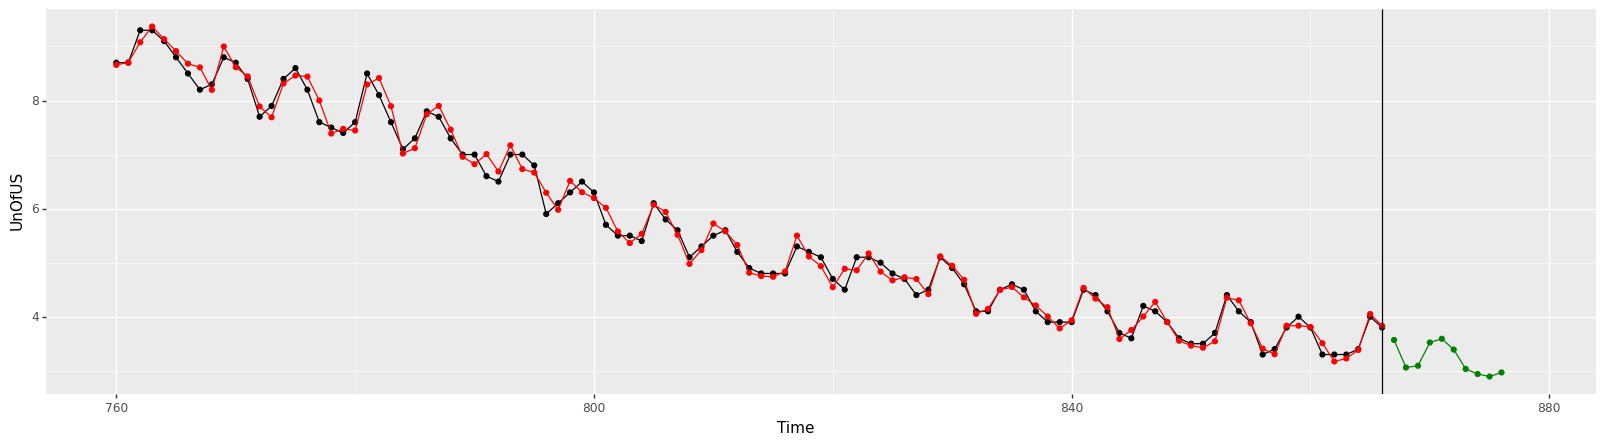

<ggplot: (8776827657601)>

In [723]:
(
    ggplot(df2prediction.iloc[759:,],aes('Time','UnOfUS')) + geom_point() + geom_line()+ theme(figure_size=(20,5)) + 
    geom_point(aes('Time','M2'),color='red') + geom_line(aes('Time','M2'),color='red') +       # fitted/predicted values of regression model
    geom_point(aes('Time','Prediction2'),color='green') + geom_line(aes('Time','Prediction2'),color='green') +
    geom_vline(xintercept = len(df2))
)